<a href="https://colab.research.google.com/github/AkindeKadjo/Life_Expectancy_prediction/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

#Predicting Life Expectancy

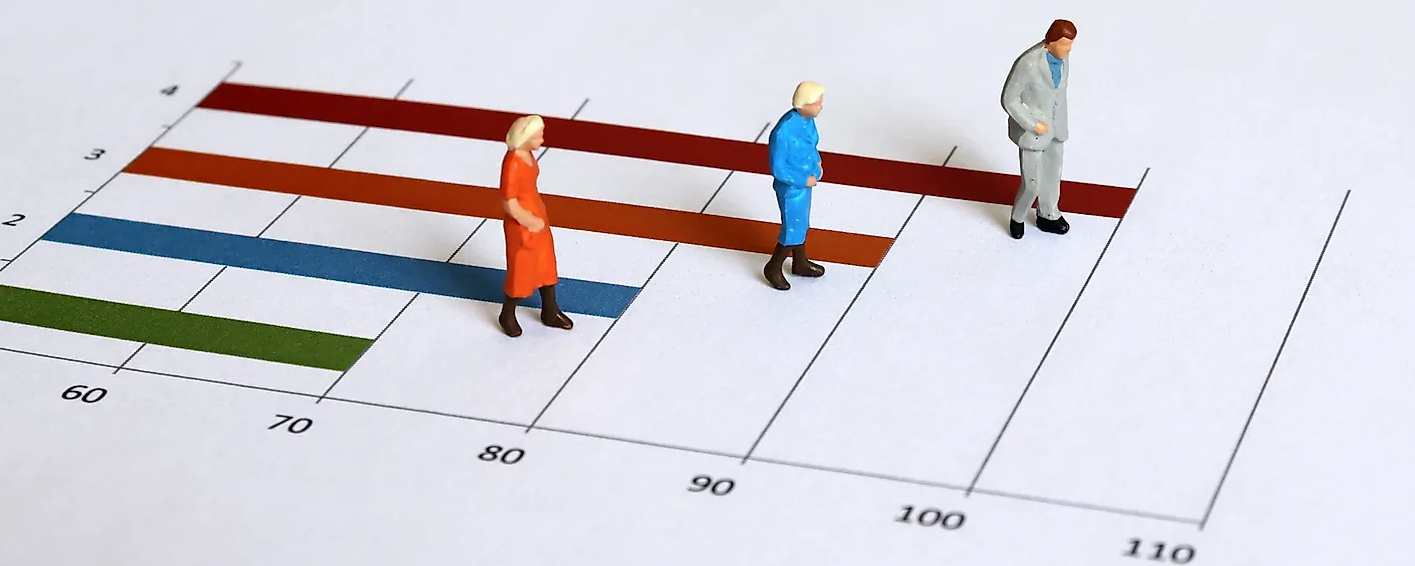

Image taken from [worldatlas.com](https://www.worldatlas.com/articles/countries-by-life-expectancy.html)

>>The Goal of this project is to have a better understanding of factors affecting Life expectancy throughout the world. And also see if one can efficiently predict life expectancy based on the factors presented. 

The data was taken from [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) 



---



---



#Library Imports and Data Loading

In [1]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the data
filename = '/content/drive/MyDrive/Job hunting project/Life Expectancy Data - Life Expectancy Data.csv'
Original_df = pd.read_csv(filename)
# keeping a copy of the df as a safety net
df = Original_df.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


A quick check for the data info is done to have an overall idea of the loaded data set

In [4]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

>There doesn't seem to be any abnormalities when it comes to the data type. Inconsistencies will be investiguated further down this workbook.

#Data Cleaning

##Checking for missing values and duplicates

In [5]:
# how many data points are duplicated?
df.duplicated().sum()

0

In [6]:
#check for missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
#percentage of rows with missing data
((df.isnull().any(axis=1).sum())/len(df)*100).round(2)

43.87

>The cell above shows that there are indeed missing values. These missing values are more than 25% of our data set, so they won't be dropped for now.

##Addressing Data Inconcistencies

In [8]:
#Identifying and addressing any inconsistencies in categorical values
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64



- Column= Status
Developing    2426
Developed      512
Name: Status, dtype: int64





>There doesn't seem to be any miss entered data.

In [9]:
#checking for significant outliers for the numerical data
df.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


In [10]:
#renaming the columns
df = df.rename(columns={'percentage expenditure':'percentage_expenditure',
                          'Income composition of resources':'Income_composition_of_resources',})
#It's not possible for percentage expenditure and Income composition of resources to have values of 0,
#these might have been miss-entered so I'll delete the rows containing these data points
df = df[df.percentage_expenditure != 0]
df = df[df.Income_composition_of_resources != 0]

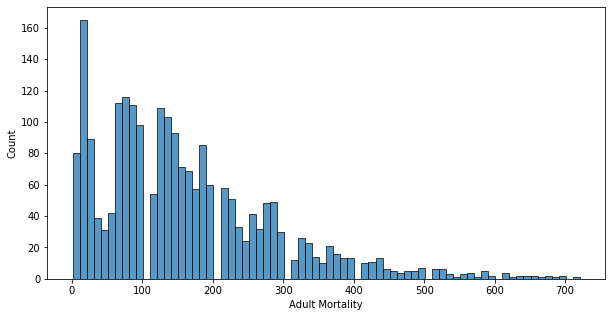

In [11]:
#The maximum mortality of 723 seems like an outlier. Let's take a quick look at the Adult mortality distribution 
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="Adult Mortality",binwidth=10);

#Assessing factors affecting life Expectancy

###Heatmap

>The Heat map is an indication of how each item correlate to one another and most importantly how they correlate to life expectancy.

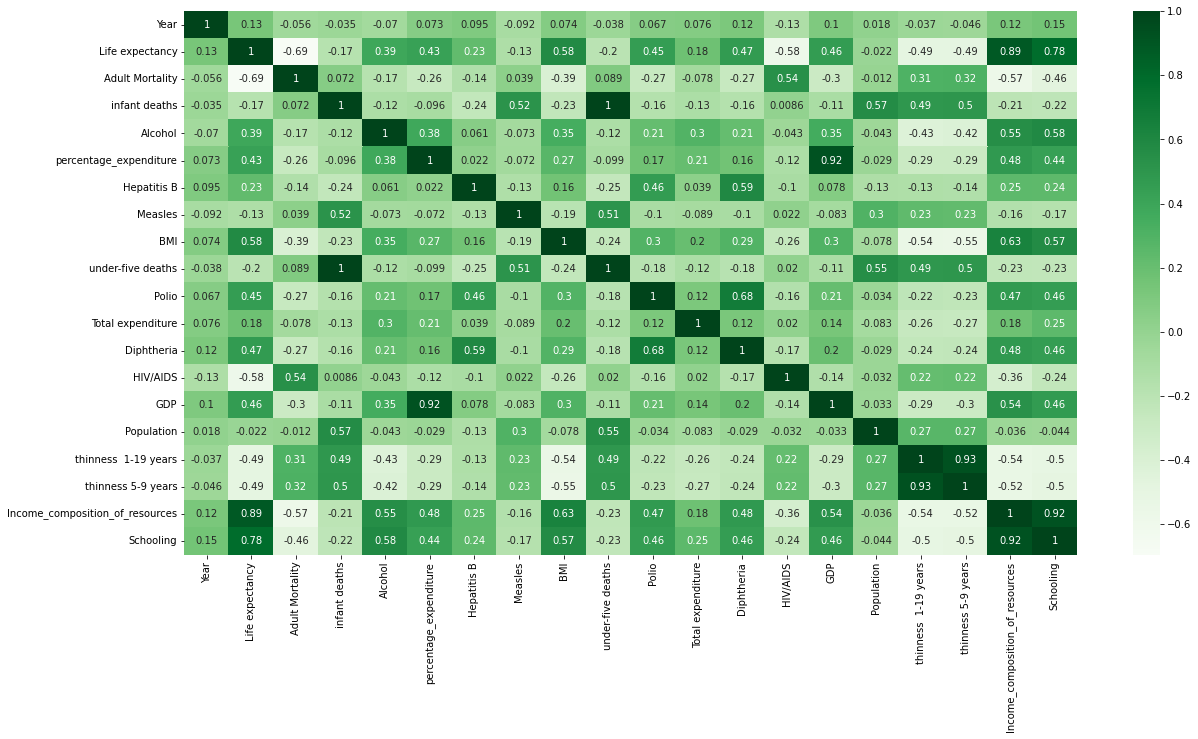

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(corr, cmap = 'Greens', annot =True);

>This heatmap tells us that the life expectancy is highly correlated to: schooling, Adult Mortality and Income composition of resources; somehow slightly  correlated to:	Alcohol,	percentage expenditure,	BMI, Polio,	Diphtheria,	HIV/AIDS,	GDP, thinness 1-19 years and thinness 5-9 years. The rest of columns are negligible and therefore will be dropped

In [13]:
#selecting numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)
#selecting only columns whose correlation's absolute value higher than 0.3
threshold = 0.3
high_corr_df = numdf[[]] # df all the columns to keep
corr = numdf.corr()
for i in range(len(corr.columns)):
  if abs(corr.iloc[i,1])>=threshold:
    coldf = (numdf.iloc[:,i]).to_frame() # getting each columns
    high_corr_df = pd.concat([high_corr_df ,coldf],axis = 1)
high_corr_df.head()

,Life expectancy,Adult Mortality,Alcohol,percentage_expenditure,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263.0,0.01,71.279624,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,73.523582,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,73.219243,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,78.184215,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,7.097109,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [14]:
#Concacenating non-numerical columns with high correlating columns
objdf = df.select_dtypes(include='object')
relevant_df= pd.concat([objdf, high_corr_df],axis = 1)
relevant_df.head()

,Country,Status,Life expectancy,Adult Mortality,Alcohol,percentage_expenditure,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Developing,65.0,263.0,0.01,71.279624,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,0.01,73.523582,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,0.01,73.219243,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,0.01,78.184215,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,0.01,7.097109,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [15]:
#check for missing values
relevant_df.isna().sum()

Country                             0
Status                              0
Life expectancy                     5
Adult Mortality                     5
Alcohol                             5
percentage_expenditure              0
BMI                                18
Polio                               3
Diphtheria                          3
HIV/AIDS                            0
GDP                                 0
thinness  1-19 years               18
thinness 5-9 years                 18
Income_composition_of_resources     3
Schooling                           0
dtype: int64

In [16]:
#percentage of rows with missing data
((relevant_df.isnull().any(axis=1).sum())/len(df)*100).round(2)

1.17

>Since the missing values are now less than 25%, the rows with missing values will be dropped so as not to skew the results.

In [17]:
relevant_df.dropna(inplace=True)

##Scatter plot

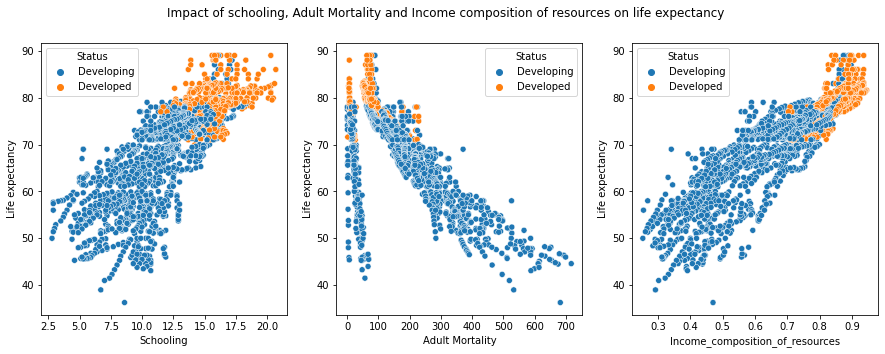

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of schooling, Adult Mortality and Income composition of resources on life expectancy')
sns.scatterplot(ax=axes[0], data=relevant_df, x='Schooling', y='Life expectancy', hue='Status')
sns.scatterplot(ax=axes[1], data=relevant_df, x='Adult Mortality', y='Life expectancy', hue='Status')
sns.scatterplot(ax=axes[2], data=relevant_df, x='Income_composition_of_resources', y='Life expectancy', hue='Status');

>Now let's look at how schooling, Adult Mortality and Income composition of resources correlate to life expectancy as a function of country status.

##Barplots

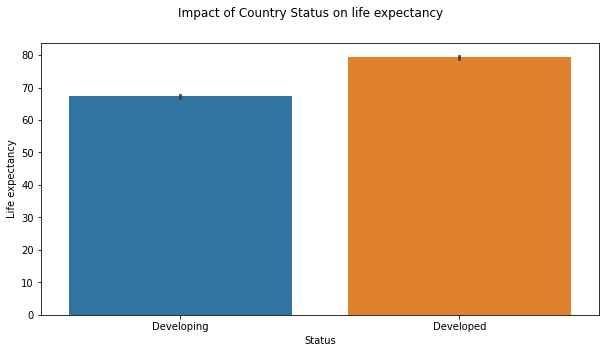

In [19]:
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Impact of Country Status on life expectancy')
sns.barplot (data=relevant_df, x='Status', y='Life expectancy');

>Developped countries have on average 10 more years of life expectancy than Developing countries. Only numerical columns will be considered for Machine Learning. There is not much info from the 'Status' and 'Country' columns.

#Life expectancy prediction with Machine learning

>Due to the fact that 'life expectancy' is a set of continuous numbers, this will be considered as a regression problem.

##Data Splitting and Preprocessing

###Data Splitting

In [20]:
#setting y as a target column being Drug
y = high_corr_df['Life expectancy']
#setting X as the feature data, I'll include the rest of the columns
X = high_corr_df.drop(columns='Life expectancy')
X.head()

,Adult Mortality,Alcohol,percentage_expenditure,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,263.0,0.01,71.279624,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,271.0,0.01,73.523582,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,268.0,0.01,73.219243,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,272.0,0.01,78.184215,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,275.0,0.01,7.097109,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


Performing a train test split, here the random state of 42 is chosen for concistency

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

###Preprocessing

Creating a preprocessing object to prepare the dataset for Machine Learning